In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from island_model import WorldModel, Island, IslandCell

In [3]:
model = WorldModel(n_islands=12, land_fraction=0.25)

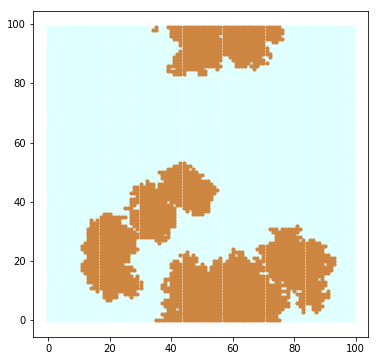

In [4]:
sea_coords = []
land_coords = []
for contents, x, y in model.grid.coord_iter():
    if contents["Land"] is None:
        sea_coords.append((x, y))
    else:
        land_coords.append((x, y))

fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(*zip(*sea_coords), s=10, c='LightCyan')
ax.scatter(*zip(*land_coords), s=10, c='Peru')

In [5]:
contents

{'Land': None, 'People': set()}

In [6]:
for agent in model.schedule.agents:
    print(agent.name)

Ociwsi
Yvlak
Pidiy
Mefue
Obyit
Koheyz
Unybea
Iyyve
Doehxy
Ukyle
Leymav
Ecuql
Ynuco
Aaroa
Qyapr
Ozcyy
Iguva
Ozuir
Ydroy
Iniira
Caineg
Uhsyh
Daacyh
Eoeity
Miugt
Izyiv
Vyimq
Itgie
Epocow
Vayxhe
Iecuwa
Icepai
Sexyj
Zuaeme
Uhyay
Unompy
Ounano
Inasuz
Yiaccy
Dapii
Buuco
Ieozh
Avvyga
Ozoqyk
Eicyb
Arhoo
Ocefyb
Nyimby
Ribea
Yiegfy
Iqocty
Heimn
Rihey
Juieig
Dyukao
Yrewak
Dagey
Xebia
Ycacmo
Ymyyo
Ycegqa
Jayqo
Agpija
Ouqumi
Ylibto
Eqwac
Woraa
Ocavz
Luzil
Asripa
Ukedyz
Xijaei
Ajtyni
Upejle
Camoa
Tasoo
Polyu
Okzif
Wouxe
Avcyz
Ehtiq
Azaqe
Yhigyf
Epihh
Komuen
Aiekuf
Ufuej
Ejvui
Asfeap
Nitihi
Igtyad
Oaouyx
Jiyee
Fidaiu
Xuroe
Yqowe
Ozegz
Oxxaye
Ujwau
Winyh


In [8]:
model.step()